# **라이브러리 로드**

In [ ]:
import datetime
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


# 모델 패키지
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,AvgPool2D, Flatten, Dense, Dropout, Input

# **컨볼루션 신경망(Convolution Neural Networks, CNN)**
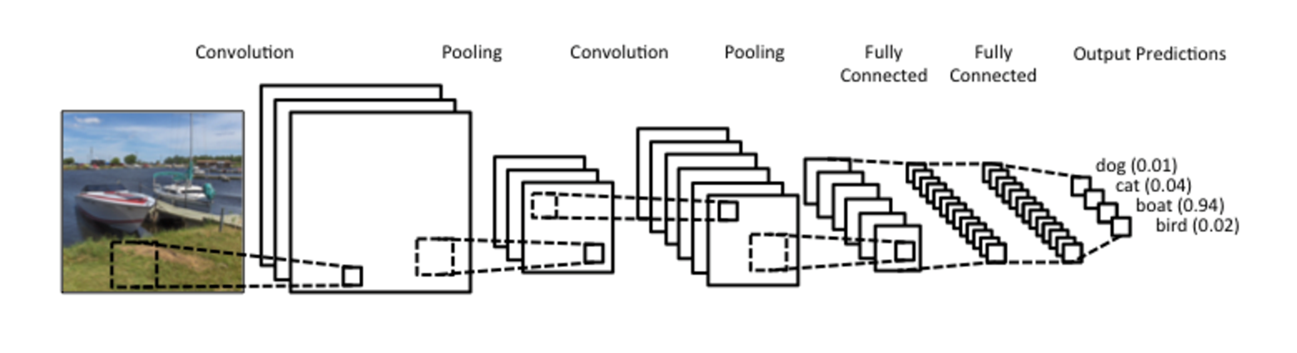

- 이미지 데이터를 처리하는 딥러닝 모델로, 특징 추출과 분류에 특화
- 합성곱 레이어와 풀링 레이어를 통해 공간적 특징을 추출하고, Fully Connected Layer로 예측 작업을 수행
- 이미지 분류, 물체 탐지, 이미지 생성 등 다양한 컴퓨터 비전 작업에 활용됨

# **1. Convolution Neural Network(CNN) 구조**


- Feature extraction : Convolutional Layer, Pooling layer
- Prediction : Flatten Layer, Fully Connected Layer(Dense Layer), Output Layer

### **1-1. Convolutional Layer**
- 이미지에서 특징(Feature)을 추출, 필터(커널)을 사용하여 입력이미지에 대한 특징 맵(Feature map)을 생성 함
- 핵심요소 : 필터(filter), 스트라이드(stride), 패딩(padding)


#### **필터(filter) 연산**
  - Filter가 이미지를 스캔하며 새로운 변수(값) 산출
  - 필터에 대응하는 원소끼리 곱하고, 그 합을 구함
  - 연산이 완료된 결과 데이터를 특징 맵(feature map)이라 부름

  - 연산 시각화

    <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  - 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈

    $\quad (n-f+1) \times (n-f+1)$

    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기

    <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  - 위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로 출력 데이터의 크기는 $(5 - 3 + 1) = 3$

In [ ]:
conv = Conv2D(filters = 16, kernel_size = 3, activation='relu')

#### **패딩(Padding)**

- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif" width="300">

- 출력 데이터의 크기

  $\quad (n+2p-f+1) \times (n+2p-f+1)$

  - 위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로 출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

- `valid`
  - 패딩을 주지 않음
  - `padding=0`은 0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미
- `same`
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같도록 유지
  - 만약, 필터(커널)의 크기가 $k$ 이면, 패딩의 크기는 $p = \frac{k-1}{2}$ (단, stride=1)

#### **스트라이드(Stride)**

- 필터를 적용하는 간격을 의미
- 아래 예제 그림은 간격이 2

  <img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif">

In [ ]:
conv =Conv2D(filters=16, kernel_size = 3, padding='same', strides = 2, activation='relu')

### **1-2. 풀링(Pooling)**

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

Max-Pooling과 Average pooling
- Max-Pooling은 해당영역에서 최대값을 찾는 방법
- Average-Pooling은 해당영역의 평균값을 계산하는 방법이다. 
- 이미지 인식 분야에서는 주로 Max-Pooling을 사용한다


#### **맥스 풀링(Max Pooling)**

- 가장 많이 사용되는 방법
- 일반적으로 stride=2, kernel_size=2 를 통해 특징맵의 크기를 절반으로 줄이는 역할
- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며, 컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 함

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

In [ ]:
maxpooling = MaxPool2D(pool_size=(2,2))

#### **평균 풀링(Avg Pooling)**

- 필터 내의 있는 픽셀값의 평균을 구하는 과정
- 과거에 많이 사용, 요즘은 잘 사용되지 않음
- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해 특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">


### **1-3. Flatten Layer**

- 2D 데이터(height, width, channels)를 Fully Connected Layer에 전달하기 위해 1D 벡터로 변환
- 특징 맵의 차원만 변경, 데이터 값이나 순서는 유지되므로 학습 파라미터는 없음
- 추출된 특징을 분류나 회귀 작업에 활용할 수 있음

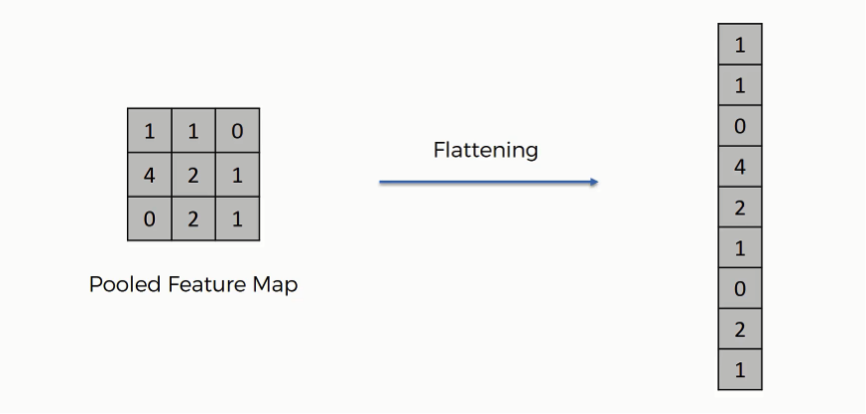

In [ ]:
flatten = Flatten()

### **1-4. 완전 연결 계층(Fully-Connected Layer)**

- CNN의 추출된 특징을 바탕으로 분류나 회귀 작업을 수행
- 각 뉴런은 모든 입력과 연결되며, 주로 ReLU 같은 활성화 함수가 사용됨
- 밀집 계층(Dense Layer)

In [ ]:
fc = Dense(units = 64, activation = 'relu')

### **1-5. Output Layer**

- 최종 예측 결과를 생성, 분류 문제에서는 softmax 활성화 함수를 통해 확률 분포를 출력
- 두 레이어는 함께 특징을 활용, 입력 데이터를 원하는 출력 형태로 변환

In [ ]:
fc = Dense(10, activation = 'softmax')

### **1-6. Dropout Layer**

- 학습 과정에서 뉴런을 랜덤하게 비활성화(0으로 설정)하여 과적합(Overfitting)을 방지하는 정규화 기법
- 각 뉴런이 독립적으로 비활성화될 확률(rate)을 설정하며, 일반적으로 0.2~0.5 범위로 사용.
- 뉴런 간의 의존성을 줄이고, 모델의 일반화 성능을 향상시킴.

In [ ]:
dropout = Dropout(0.3)

***

# **2. CNN 모델 실습 - Fashion MNIST / MNIST 데이터 셋**

#### **Fashion MNIST**
- 의류 품목의 흑백 이미지로 구성된 데이터셋
- 10개의 클래스(예: 티셔츠, 신발, 가방 등)와 28x28 크기의 70,000개 이미지(훈련: 60,000개, 테스트: 10,000개)로 이루어짐
- 이미지 분류 모델 실습에 적합하며, CNN, 딥러닝 등의 학습을 테스트하는 데 주로 활용됨

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

## **2-1. Base model (Conv Layer - Fully Connected Layer - Output Layer)**

### **데이터 로드 - Fashion MNIST**

In [ ]:
# .gz 파일에서 데이터를 로드하는 헬퍼 함수
def load_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # 이미지 데이터를 버퍼에서 읽어옴
        return data.reshape(-1, 28, 28)  # 데이터를 28x28 크기로 변환

def load_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)  # 레이블 데이터를 버퍼에서 읽어옴

# Fashion MNIST 데이터셋의 파일 경로
dataset_dir = './data/fashion-mnist'  # 필요에 따라 경로를 수정
train_images_path = os.path.join(dataset_dir, 'train-images-idx3-ubyte.gz')  # 훈련 이미지 경로
train_labels_path = os.path.join(dataset_dir, 'train-labels-idx1-ubyte.gz')  # 훈련 레이블 경로
test_images_path = os.path.join(dataset_dir, 't10k-images-idx3-ubyte.gz')  # 테스트 이미지 경로
test_labels_path = os.path.join(dataset_dir, 't10k-labels-idx1-ubyte.gz')  # 테스트 레이블 경로

# 데이터셋 로드


# CNN에 적합하도록 채널 차원 추가(CNN 입력을 위해 4차원 데이터로 변경)


# 데이터셋의 크기 출력


### **데이터 정규화**

In [ ]:
# 픽셀 값을 정규화


***

## **2-1. Base model (Conv Layer - Fully Connected Layer - Output Layer)**

### **모델 구성**

In [ ]:
def build_base():

    return model

model = build_base()
model.summary()

### **모델 학습**

In [ ]:
# 모델 학습
hist = model.fit()

### **모델 학습과정 시각화**

### **모델 평가**

#### Overfitting 발생으로 validation 곡선이 수렴성이 약하게 나타남 ####

#### Overfitting(과적합)? ###
- 모델이 학습 데이터에 과도하게 맞춰져, 새로운 데이터 혹은 테스트 데이터에 일반화되지 못하는 현상
- 원인 : 학습 데이터가 작거나 불균형하거나, 모델이 지나치게 복잡한 경우 발생
- 증상 : 학습 데이터에서 높은 정확도가 산출되지만, 테스트 데이터에서는 성능이 급격히 저하됨
- 해결책 :
    - Pooling layer 추가
    - Dropout 기법 사용

## **2-2. Pooling layer 추가 (Conv Layer - Pooling Layer - Fully Connected Layer - Output Layer)**

### **모델 구성 및 컴파일**

### **모델 학습**

In [ ]:
# 모델 학습


### **모델 학습과정 시각화**

### **모델 평가**

## **2-3. Dropout layer 추가 (Conv Layer - Pooling Layer - Fully Connected Layer - Dropout Layer -Output Layer)**

### **모델 구성 및 컴파일**

### **모델 학습**

### **모델 학습과정 시각화**

### **모델 평가**

### **추론 결과 시각화**